### Make sure GPU is on

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import tensorflow_datasets as tfds
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import montage

### (10 pts.) Prepare the datasets

#### load the plant_village data from tensorflow_datasets. Split by %80-10-10 train-val-test using split= input.

#### Please check https://www.tensorflow.org/datasets/splits

In [0]:
raw_test = tfds.load('plant_village', split='train[90%:100%]', as_supervised=True)
raw_val = tfds.load('plant_village', split='train[80%:90%]', as_supervised=True)
raw_train = tfds.load('plant_village', split='train[:80%]', as_supervised=True)

#### Normalize each image into [0,1] range, shuffle and minibatch 128.

In [0]:
pp_test = raw_test.map(lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)).shuffle(1024).batch(128)
pp_val = raw_val.map(lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)).batch(128)
pp_train = raw_train.map(lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)).batch(128)  

In [0]:
for i, j in pp_train.take(1):
  print(i.shape)
print(256*256*3)

(128, 256, 256, 3)
196608


#### Display the examples from the dataset.

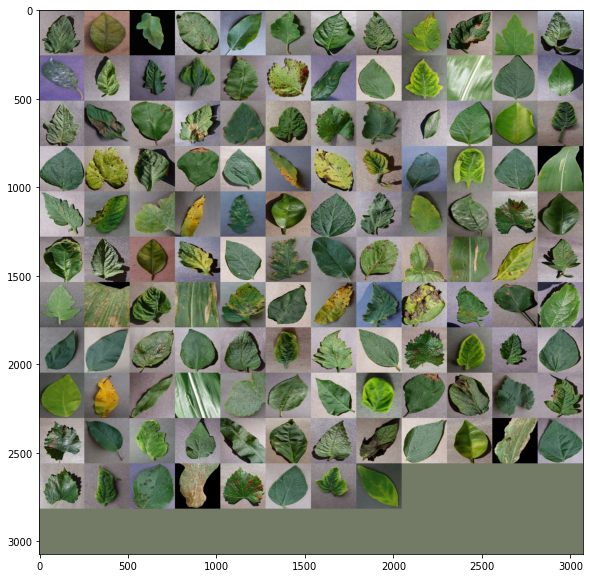

In [0]:
plt.figure(figsize=(10,10))
for example in pp_train.take(1):  # Only take a single example
  image, label = example[0], example[1]
  plt.imshow(montage(image, multichannel=True))

### (20 pts) The Fully Connected Neural Network implementation

#### It is a 4 layer (Fully Connected) Neural Network. The feature depths are [512,256,128] and last softmax layer has 38 output. Train for 10 epochs, with 0.001 learning rate and categorical cross entropy.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(256, 256, 3)),
  tf.keras.layers.Flatten(),### Flatten
  tf.keras.layers.Dense(512, activation='relu'),### Dense
  tf.keras.layers.Dense(256, activation='relu'),### Dense
  tf.keras.layers.Dense(128, activation='relu'),### Dense
  tf.keras.layers.Dense(38, activation='softmax')### Dense softmax
])

model.compile(
    optimizer= keras.optimizers.Adam(lr=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'])

history = model.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)

Epoch 1/10
340/340 [==============================] - 71s 209ms/step - loss: 8.9489 - sparse_categorical_accuracy: 0.2234 - val_loss: 2.7783 - val_sparse_categorical_accuracy: 0.2939
Epoch 2/10
340/340 [==============================] - 54s 158ms/step - loss: 2.6015 - sparse_categorical_accuracy: 0.3444 - val_loss: 2.5554 - val_sparse_categorical_accuracy: 0.3513
Epoch 3/10
340/340 [==============================] - 54s 158ms/step - loss: 2.1856 - sparse_categorical_accuracy: 0.4223 - val_loss: 2.0744 - val_sparse_categorical_accuracy: 0.4428
Epoch 4/10
340/340 [==============================] - 55s 161ms/step - loss: 1.7884 - sparse_categorical_accuracy: 0.5013 - val_loss: 1.7845 - val_sparse_categorical_accuracy: 0.4889
Epoch 5/10
340/340 [==============================] - 55s 160ms/step - loss: 1.5365 - sparse_categorical_accuracy: 0.5556 - val_loss: 1.4496 - val_sparse_categorical_accuracy: 0.5721
Epoch 6/10
340/340 [==============================] - 54s 159ms/step - loss: 1.3813 -

#### Plot training & validation accuracy values

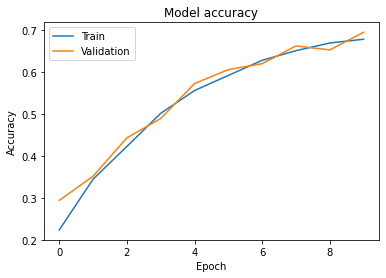

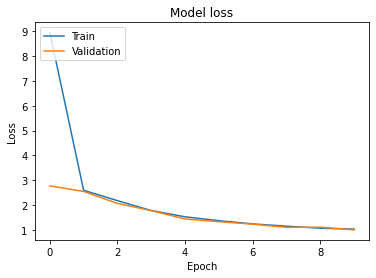

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Calculate test set

In [0]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 8s 189ms/step - loss: 0.9912 - sparse_categorical_accuracy: 0.6943
test loss, test acc: [0.9911953806877136, 0.6942909955978394]


### (20 pts.) The Convolutional Neural Network implementation

#### It is a 4 layer Convolutional Neural Network. First two layers are Convolutional and last two layers are Fully Connected. The depths are [64,128,64] and the last softmax layer has 38 output. Train for 10 epochs, with 0.001 learning rate and categorical cross entropy.

In [0]:
model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='relu',input_shape=(256, 256, 3)),### Conv2D layer
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),### MaxPooling2D layer
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, activation='relu'),### Conv2D layer
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'), ### MaxPooling2D layer

  tf.keras.layers.Flatten(),### Flatten
  tf.keras.layers.Dense(64, activation='relu'),### Dense
  tf.keras.layers.Dense(38, activation='softmax') ### Dense softmax
])

model_cnn.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy',])

history_cnn = model_cnn.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)

Epoch 1/10
340/340 [==============================] - 131s 387ms/step - loss: 1.4348 - sparse_categorical_accuracy: 0.6515 - val_loss: 0.7063 - val_sparse_categorical_accuracy: 0.7943
Epoch 2/10
340/340 [==============================] - 132s 388ms/step - loss: 0.4384 - sparse_categorical_accuracy: 0.8673 - val_loss: 0.5358 - val_sparse_categorical_accuracy: 0.8455
Epoch 3/10
340/340 [==============================] - 132s 387ms/step - loss: 0.2519 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.5262 - val_sparse_categorical_accuracy: 0.8626
Epoch 4/10
340/340 [==============================] - 132s 387ms/step - loss: 0.1630 - sparse_categorical_accuracy: 0.9487 - val_loss: 0.7202 - val_sparse_categorical_accuracy: 0.8243
Epoch 5/10
340/340 [==============================] - 132s 387ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.6611 - val_sparse_categorical_accuracy: 0.8534
Epoch 6/10
340/340 [==============================] - 131s 387ms/step - loss: 0.

#### Plot training & validation accuracy values

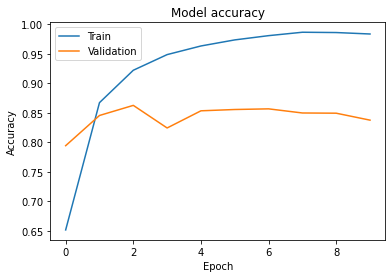

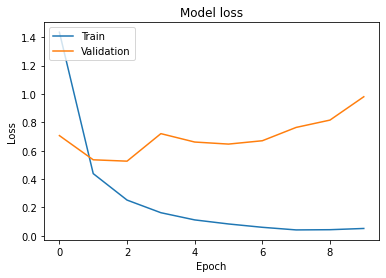

In [0]:
# Plot training & validation accuracy values
plt.plot(history_cnn.history['sparse_categorical_accuracy'])
plt.plot(history_cnn.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Calculate test set

In [0]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model_cnn.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 12s 270ms/step - loss: 0.9196 - sparse_categorical_accuracy: 0.8503
test loss, test acc: [0.9195566177368164, 0.8502762317657471]
